In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-prediction/cleaned_data.csv


In [59]:
import sklearn
loan = pd.read_csv('/kaggle/input/loan-prediction/cleaned_data.csv')
loan.drop(['Loan_ID'], inplace=True, axis=1)
loan

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
2,3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
3,4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
4,5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
476,610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
477,611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
478,612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [60]:
# import sklearn
# loan = pd.read_csv('/kaggle/input/loan-prediction/cleaned_data.csv')
# loan.drop(['Unnamed'],inplace=True, axis=1)
# loan

In [61]:
print("Shape of the data frame: ", loan.shape)
print("Total null values: ", loan.isna().sum())
print("Duplicate values: ", loan.duplicated().sum())

Shape of the data frame:  (480, 13)
Total null values:  Unnamed: 0           0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Duplicate values:  0


In [62]:
# loan_ds.drop_duplicates(inplace=True)
# print("Shape of the data frame: ",loan.shape)
# print("\n")
print("Loan_Status categories with its count \n", loan["Loan_Status"].value_counts())

Loan_Status categories with its count 
 Loan_Status
1    332
0    148
Name: count, dtype: int64


In [63]:
loan.describe()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,307.214583,0.820833,0.647917,0.862500,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,177.433330,0.383892,0.478118,1.225107,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,154.750000,1.000000,0.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,302.500000,1.000000,1.000000,0.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,459.500000,1.000000,1.000000,2.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,4.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [64]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# loan["Loan_Status"] = label_encoder.fit_transform(loan["Loan_Status"])
# print("\n")
print(loan["Loan_Status"].value_counts())

Loan_Status
1    332
0    148
Name: count, dtype: int64


In [65]:
X = loan.drop(["Loan_Status"], axis=1)
Y = loan["Loan_Status"]

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [67]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [68]:
y_pred = classifier.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[14, 21],
       [ 4, 57]])

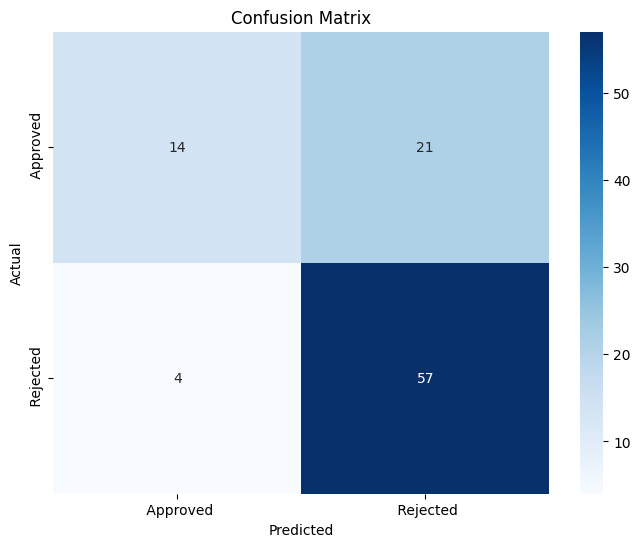

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax)

# Set labels, title, and axis ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels([' Approved', ' Rejected'])
ax.yaxis.set_ticklabels([' Approved', ' Rejected'])

# Display the plot
plt.show()

In [71]:
y_pred = classifier.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, y_pred)
print('The accuracy of the Random Forest is:', accuracy)

The accuracy of the Random Forest is: 0.7395833333333334


In [73]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.40      0.53        35
           1       0.73      0.93      0.82        61

    accuracy                           0.74        96
   macro avg       0.75      0.67      0.67        96
weighted avg       0.75      0.74      0.71        96



In [74]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
print('accuracy:',accuracy_score(y_pred,Y_test))
print('precision:',precision_score(y_pred,Y_test,average='micro'))
print('recall:',recall_score(y_pred,Y_test,average='micro'))
print('f1_score:',f1_score(y_pred,Y_test,average='micro'))

accuracy: 0.7395833333333334
precision: 0.7395833333333334
recall: 0.7395833333333334
f1_score: 0.7395833333333334
